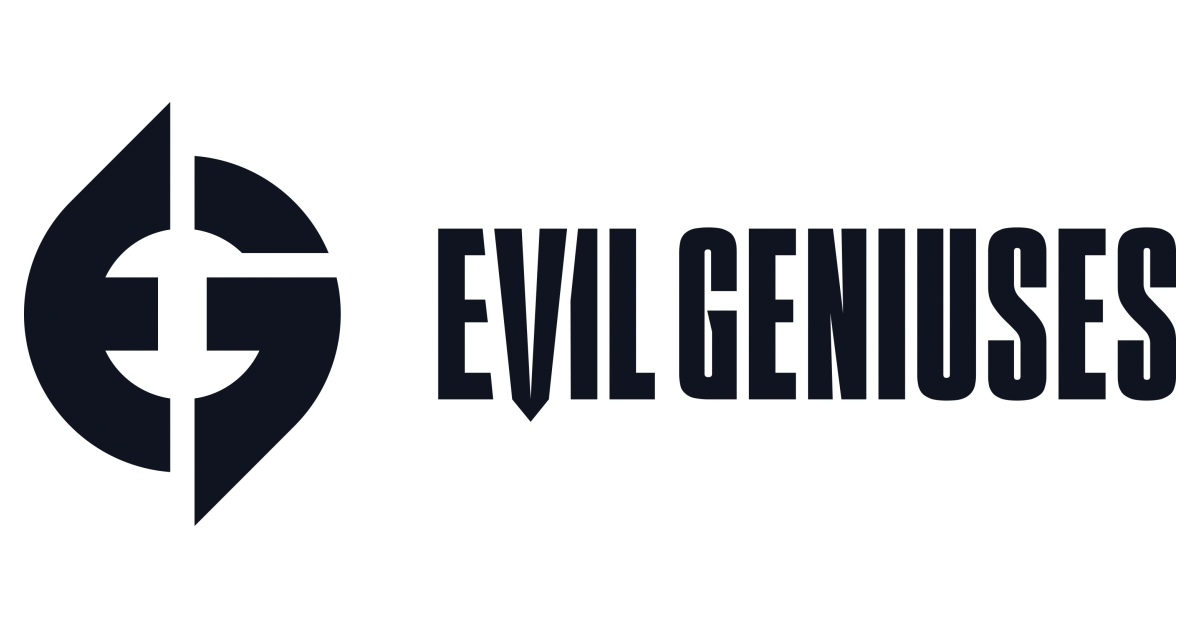

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [2]:
# Created & Edited by Ruoxin Wang
# LinkedIn https://www.linkedin.com/in/ruoxin-wang-5b74a81b4/
# https://github.com/RuoxinWang

In [3]:
# Import data
df=pd.read_excel('social_data.xlsx')
df.head(10)

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video
5,2023-03-31 19:42:11.331,CSGO,TWITTER,N/A,0,0,Photo
6,2023-03-31 19:40:57.383,CSGO,TWITTER,Community Engagement,1882,83,Photo
7,2023-03-31 19:23:57.349,CSGO,TWITTER,Community Engagement,17892,3076,Video
8,2023-03-31 19:15:14.431,CSGO,TWITTER,N/A,0,0,Video
9,2023-03-31 18:55:51.855,CSGO,TWITTER,Community Engagement,13874,1447,Video


In [4]:
print(df.shape)
print(df.nunique())

(3479, 7)
Published Date       3407
Account                 6
Account Type            6
Campaign Name           4
Total Impressions    2404
Total Engagements     997
Media Type              7
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Published Date     3479 non-null   datetime64[ns]
 1   Account            3479 non-null   object        
 2   Account Type       3479 non-null   object        
 3   Campaign Name      3479 non-null   object        
 4   Total Impressions  3479 non-null   int64         
 5   Total Engagements  3479 non-null   int64         
 6   Media Type         3479 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 190.4+ KB


# Q1: What is the typical engagement rate we can expect? What’s the likelihood that we can achieve a 15% engagement rate?

In [6]:
# Column 'Account' has both 'General' and 'General '
account_values = df['Account'].unique()
account_values

array(['CSGO', 'General ', 'DOTA2', 'Content Creators', 'Valorant',
       'General'], dtype=object)

In [7]:
# Renamed all 'General ' into 'General'
df['Account'] = df['Account'].str.strip()
account_values = df['Account'].unique()
account_values

array(['CSGO', 'General', 'DOTA2', 'Content Creators', 'Valorant'],
      dtype=object)

I found in column 'Account' there are some typo, there are both 'General' and 'General ' in this column. I renamed all 'General ' into 'General' using df.str.strip()

In [8]:
# The formula of Engagement Rate
df['Engagement Rate'] = df['Total Engagements'] / df['Total Impressions'] * 100


In [9]:
df.describe()

,Published Date,Total Impressions,Total Engagements,Engagement Rate
count,3479,3479.000000,3479.000000,2735.000000
mean,2023-02-19 23:45:11.050880768,10972.453579,947.390629,40.492622
min,2023-01-01 14:59:04,0.000000,0.000000,0.000000
25%,2023-01-31 17:43:34,167.000000,0.000000,1.426307
50%,2023-02-18 13:18:05.768000,1884.000000,39.000000,3.086352
75%,2023-03-09 17:23:49.910000128,12467.000000,276.500000,6.176307
max,2023-03-31 19:55:43.192000,753227.000000,95062.000000,94000.000000
std,NaN,29577.108063,3468.628038,1797.553128


After calcualte the Engagment Rate, I found there are few row with extremely high Engagement Rate

In [10]:
df.loc[df['Engagement Rate'] >= 100]

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate
837,2023-03-10 12:37:06,General,FBPAGE,N/A,1,940,Photo,94000.000000
1586,2023-02-23 06:18:27,General,FBPAGE,N/A,1,1,Photo,100.000000
3216,2023-01-19 06:02:34,General,FBPAGE,N/A,5,44,Photo,880.000000
3457,2023-01-05 11:55:44,General,FBPAGE,N/A,300,3776,Photo,1258.666667


There are 4 rows with greater or equal than 100% Engagement Rate. This is not usually happened. I decided to drop those 4 rows and use the rest more common situation for the following analyze.

In [11]:
df1 = df
df1.drop(df1[df1['Engagement Rate']>=100].index, inplace = True)
df1.describe()

,Published Date,Total Impressions,Total Engagements,Engagement Rate
count,3475,3475.000000,3475.000000,2731.000000
mean,2023-02-20 00:08:09.011515136,10984.995396,947.111079,5.312579
min,2023-01-01 14:59:04,0.000000,0.000000,0.000000
25%,2023-01-31 17:46:47.500000,169.000000,0.000000,1.424945
50%,2023-02-18 13:18:05.768000,1888.000000,38.000000,3.078024
75%,2023-03-09 17:23:49.910000128,12469.000000,276.000000,6.153546
max,2023-03-31 19:55:43.192000,753227.000000,95062.000000,60.000000
std,NaN,29591.818356,3470.221546,6.953663


Text(0, 0.5, 'Engagement Rate')

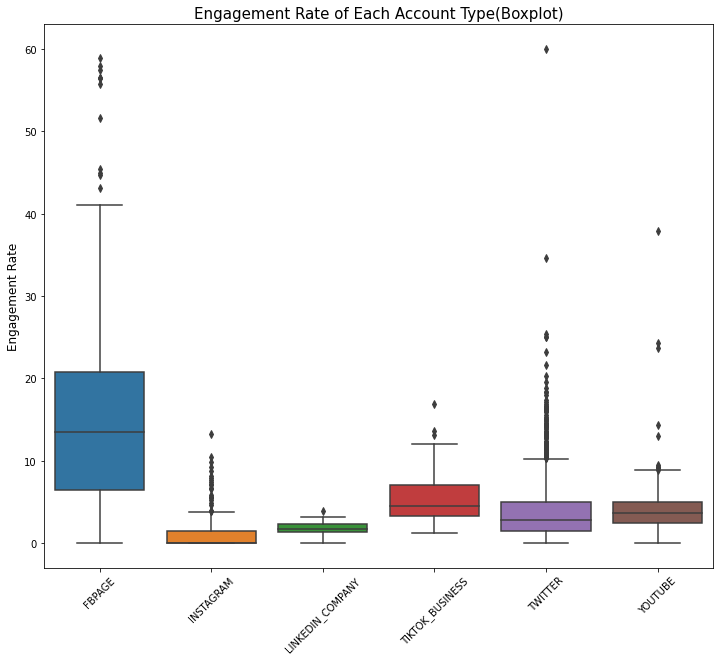

In [12]:
# Create a boxplot of Engagement Rate of Each Acoount Type
plt.figure(figsize = (12, 10))
g = sns.boxplot(x = 'Account Type', y = 'Engagement Rate', data = df1, order=['FBPAGE', 'INSTAGRAM', 'LINKEDIN_COMPANY', 
                                                         'TIKTOK_BUSINESS', 'TWITTER', 'YOUTUBE'])
g.set_xticklabels(g.get_xticklabels(), rotation = 45)
g.set_title("Engagement Rate of Each Account Type(Boxplot)", fontsize = 15)
g.set_xlabel("", fontsize = 12)
g.set_ylabel("Engagement Rate", fontsize = 12)



From the box plots, the following conclusions can be drawn. The Account Types can be roughly categorized into three groups. The first group consists of Facebook Pages, which exhibit the highest user engagement rate, with a median over 10%, an upper quartile over 20%, and a max over 40%, Facebook Pages outperform other Account Types in these metrics.

The second group includes Twitter, YouTube, and TikTok. These Account Types share a common characteristic of having a max over 10%. Additionally, the interquartile range for these Account Hypes is relatively small, indicating a stable level of user's engagement. Furthermore, this group of Account Types still retains the probability of generating popular posts(which shown as extremum in this dataset), especially on Twitter and YouTube.

The last group comprises Instagram and LinkedIn Company. Both of these Account Types demonstrate worse user engagement rates and max.

For a 15% user engagement rate, I think, from the data point of view, it is possible for Facebook Page, Twitter, YouTube, and TikTok to be achieved. It also depends on other factors such as time of posting, content detail and media type.

Different Account Types have different user engagement rates, which may be caused by the user types, post types, and characteristics of the platform(which means Account). I will conduct further analysis in the follow-up steps

# Q2: Does day of the week and time of posting affect engagement rates?

In [13]:
# Separate Published Date into Year, Month, Day, Day Of Week and Time(Hour)
df1['Year'] = df1['Published Date'].dt.year
df1['Month'] = df1['Published Date'].dt.month
df1['Day'] = df1['Published Date'].dt.day
df1['DayOfWeek'] = df1['Published Date'].dt.dayofweek
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df1['DayOfWeek'] = df1['DayOfWeek'].map(lambda x: day_names[x])
df1['Time'] = df1['Published Date'].dt.strftime('%H')

#df1 = df1.drop("Published Date", axis = 1)
df1.head()


,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate,Year,Month,Day,DayOfWeek,Time
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text,NaN,2023,3,31,Friday,19
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text,NaN,2023,3,31,Friday,19
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text,NaN,2023,3,31,Friday,19
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text,NaN,2023,3,31,Friday,19
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video,12.766628,2023,3,31,Friday,19


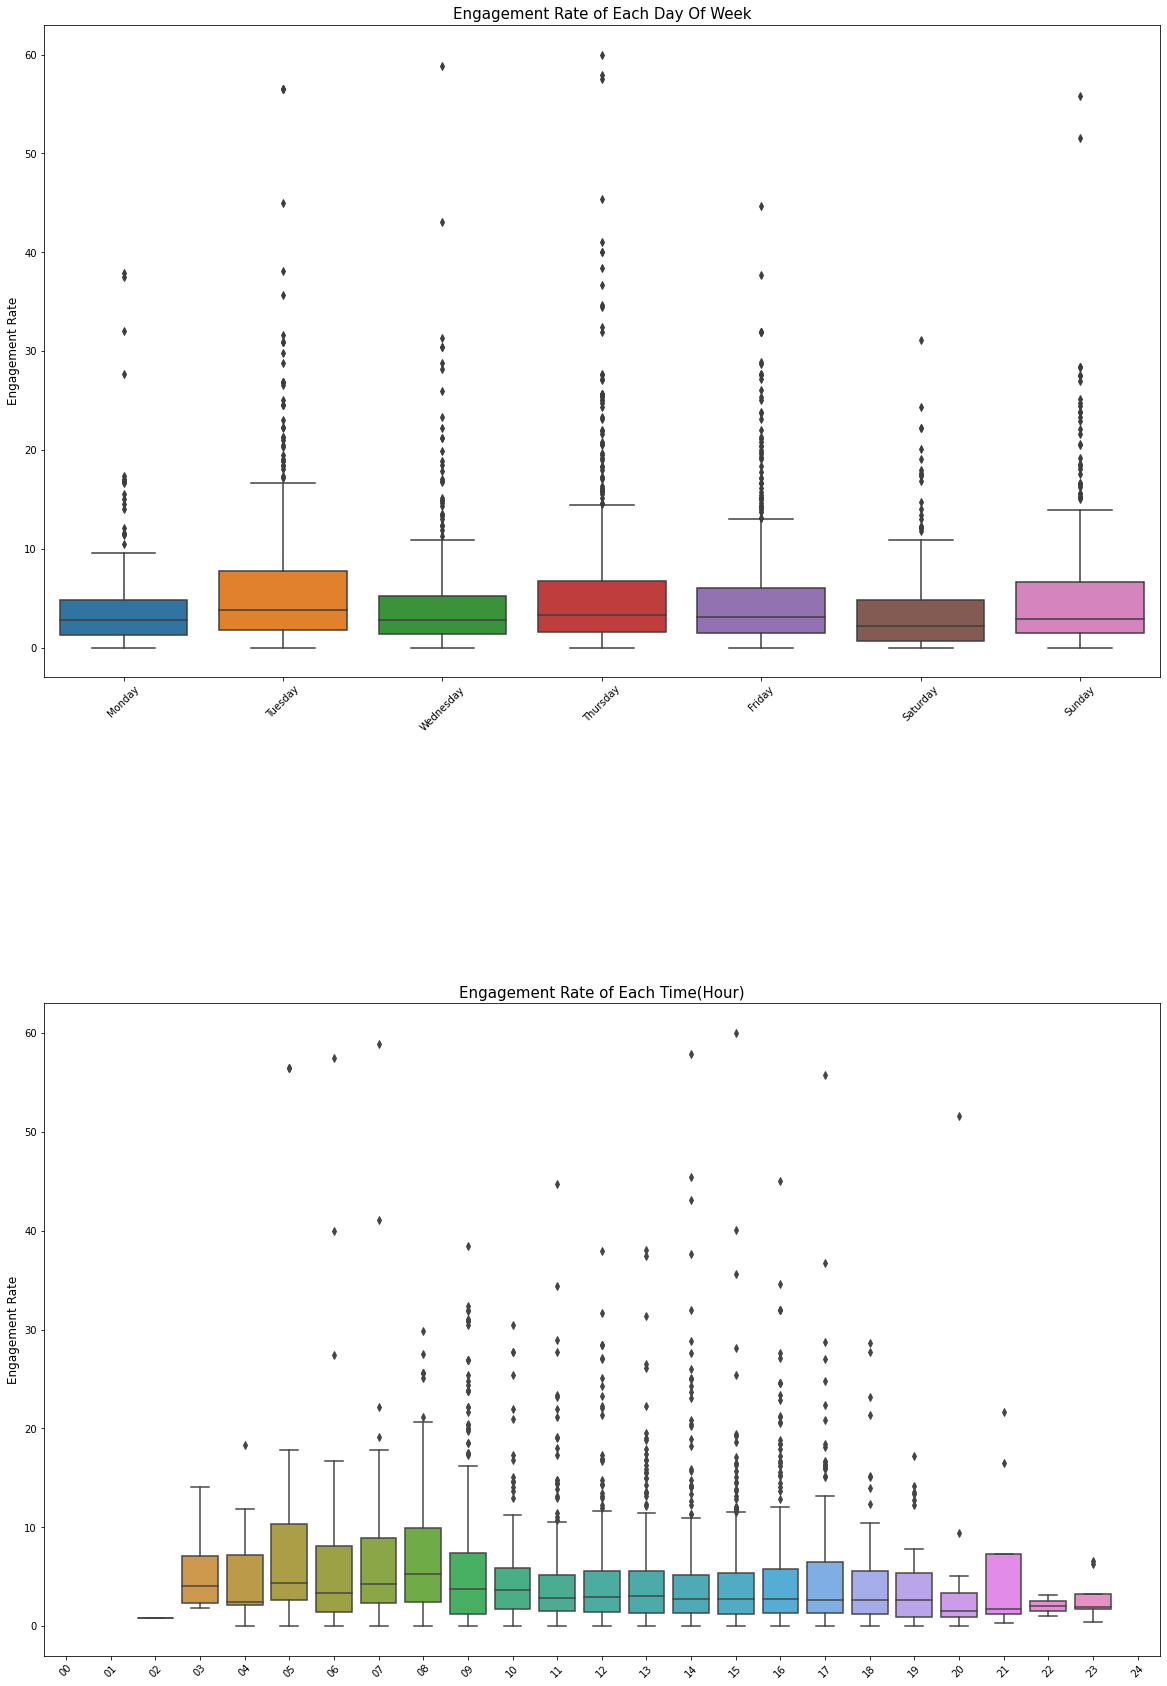

In [14]:
plt.figure(figsize = (20,30))

# Create boxplot of Engagement Rate of Each Day Of Week
plt.subplot(211)
g = sns.boxplot(x = 'DayOfWeek', y = 'Engagement Rate', data = df1, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
g.set_xticklabels(g.get_xticklabels(), rotation = 45)
g.set_title("Engagement Rate of Each Day Of Week", fontsize = 15)
g.set_xlabel("", fontsize = 12)
g.set_ylabel("Engagement Rate", fontsize = 12)


# Create boxplot of Engagement Rate of Each Time(Hour)
plt.subplot(212)
g = sns.boxplot(x = 'Time', y = 'Engagement Rate', data = df1, order=['00','01','02','03','04','05','06','07','08','09','10',
                                                                      '11','12','13','14','15','16','17','18','19','20','21',
                                                                      '22','23','24'])
g.set_xticklabels(g.get_xticklabels(), rotation = 45)
g.set_title("Engagement Rate of Each Time(Hour)", fontsize = 15)
g.set_xlabel("", fontsize = 12)
g.set_ylabel("Engagement Rate", fontsize = 12)



plt.subplots_adjust(hspace = 0.5)


<Figure size 1440x2160 with 0 Axes>

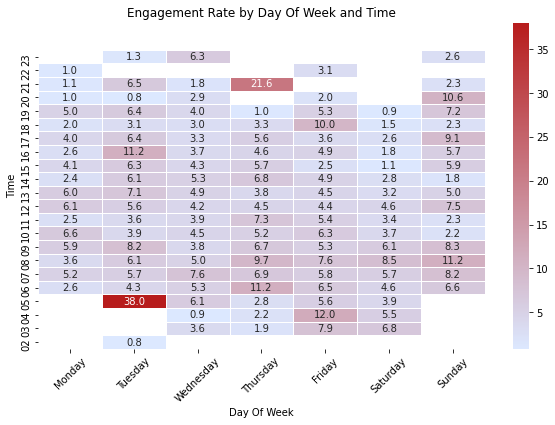

In [15]:
plt.figure(figsize = (20,30))

heatmap_data = df.pivot_table(index='Time', columns='DayOfWeek', values='Engagement Rate')
# Set the color
colors = ["#DCE8FF", "#B71C1C"]
cmap = mcolors.LinearSegmentedColormap.from_list("Custom", colors, N=256)

# Define the order of the day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Reorder the x axis
heatmap_data = heatmap_data[day_order]


# Create the heatmap using sns.heatmap()
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap=cmap, annot=True, fmt=".1f", linewidths=0.5,
           xticklabels=day_order)

# Reorder the y axis
NY = 24
plt.ylim(0, NY)


plt.title('Engagement Rate by Day Of Week and Time')
plt.xlabel('Day Of Week')
plt.ylabel('Time')


plt.xticks(rotation=45)


plt.show()


#df1.groupby(['DayOfWeek', 'Time'])['Engagement Rate'].mean()

In order to analyze the impact of Day Of Week and Time Of Posting on engagement rate, I conducted three parts of analysis. The first two parts focused on individually impact analyzing of each factors, while the third part involved a comprehensive analysis of both factors.

From the first visualization, I observe that the top three Day Of Week with the highest median engagement rate are Tuesday, Thursday, and Sunday. Additionally, these three Day Of Week also had the highest max of engagement rate among all weekdays. Monday and Saturday show relatively lower engagement rates. From the data point of view, the lack of extreme values in these two days, I think this also shows that it is not easy to produce popular posts in these two days.

It is noteworthy that despite both being weekends, Sunday exhibited a higher user engagement rate compared to Saturday. Among weekdays, Monday showed a significantly lower engagement rate compared to the other days. These findings shed light on the impact of weekdays and posting times on user engagement, highlighting the importance of considering these factors when planning content strategies.

In analyzing the engagement rate across different time periods, I performed some data processing by splitting the "Published Date" into separate columns for year, month, day, and hour.

From the second visualization, I observe that the engagement rate is generally higher before 9 AM, with fewer extreme values. This time period typically corresponds to the hours before people begin their daily work. From 9 AM to 5 PM, which constitutes the main working hours, the user engagement rate is lower, which aligns with logical expectations. After 5 PM, the engagement rate shows a slight increase compared to the working hours. However, due to people primarily returning to their families during this time, the overall user engagement rate is lower than before work, with fewer extreme values.

In summary, the engagement rate tends to be higher and more stable before 9 AM, with fewer extreme values. During the working hours, although the engagement rate decreases, there are still instances of extreme values, indicating the occurrence of popular posts and high engagement rate. In the post-work hours, the engagement rate shows a slight increase compared to the first half of the day but remains lower than before 9 AM. Additionally, this time period exhibits fewer extreme values, indicating a lower likelihood of generating popular posts.

The third visualization mainly analyzes the changes in the engagement rate under the simultaneous effects of Day Of Week and Time (Hour). I used a heatmap for this part of the visualization, the darker  color represent the higher average engagement rate during that time period. Here I mainly observe the cells with high engagement rate, and I choose the part greater than 10%. Such cells are mainly distributed at 5am and 4pm on Tuesday, 6am and 9pm on Thursday, 4am and 5pm on Friday, and 8am and 8pm on Saturday. These high engagement rates mainly occur during non-working hours and Sundays on weekdays, which is also in line with the analysis of the previous two parts. In weekdays, the engagement rates on Tuesday, Thursday, and Friday are higher, and they mainly occur in the period of time before and after daliy work. And on weekends, Sundays have higher engagement rates than Saturdays.

# Q3: How are our game titles doing in terms of social performance? Is there a specific game we should focus more on or less?

In [16]:
# Create a new DataFrame include Post Count, Total Impressions, Total Engagements of Each Account Type
df2 = df1.groupby('Account').agg({'Published Date': 'count', 'Total Impressions': 'sum', 'Total Engagements': 'sum'}).reset_index()
df2 = df2.rename(columns={'Published Date': 'Post Count'})
df2['Engagement Rate'] = df2['Total Engagements'] / df2['Total Impressions'] * 100
df2['Total Impressions/Post'] = df2['Total Impressions'] / df2['Post Count']
df2['Total Engagements/Post'] = df2['Total Engagements'] / df2['Post Count']
df2


,Account,Post Count,Total Impressions,Total Engagements,Engagement Rate,Total Impressions/Post,Total Engagements/Post
0,CSGO,270,2313918,92336,3.990461,8570.066667,341.985185
1,Content Creators,53,45186,1387,3.069535,852.566038,26.169811
2,DOTA2,803,1859326,123990,6.668545,2315.474471,154.408468
3,General,2289,33931450,3072567,9.055219,14823.700306,1342.318480
4,Valorant,60,22979,931,4.051525,382.983333,15.516667


I create a new DataFrame include the following columns:
Account
Post Count, use the count of 'Published Date' to repersent
Total Impressions
Total Engagements
Engagement Rate, Total Engagements / Total Impressions
Total Impressions/Post, Total Impressions / Post Count
Total Engagements/Post, Total Engagements / Post Count

From the data frame, the value of each factor of General is much higher than other Accounts. So I create a sub-data frame that does not include General.

In [17]:
df2sub = df2[df2['Account'] != 'General']
df2sub

,Account,Post Count,Total Impressions,Total Engagements,Engagement Rate,Total Impressions/Post,Total Engagements/Post
0,CSGO,270,2313918,92336,3.990461,8570.066667,341.985185
1,Content Creators,53,45186,1387,3.069535,852.566038,26.169811
2,DOTA2,803,1859326,123990,6.668545,2315.474471,154.408468
4,Valorant,60,22979,931,4.051525,382.983333,15.516667


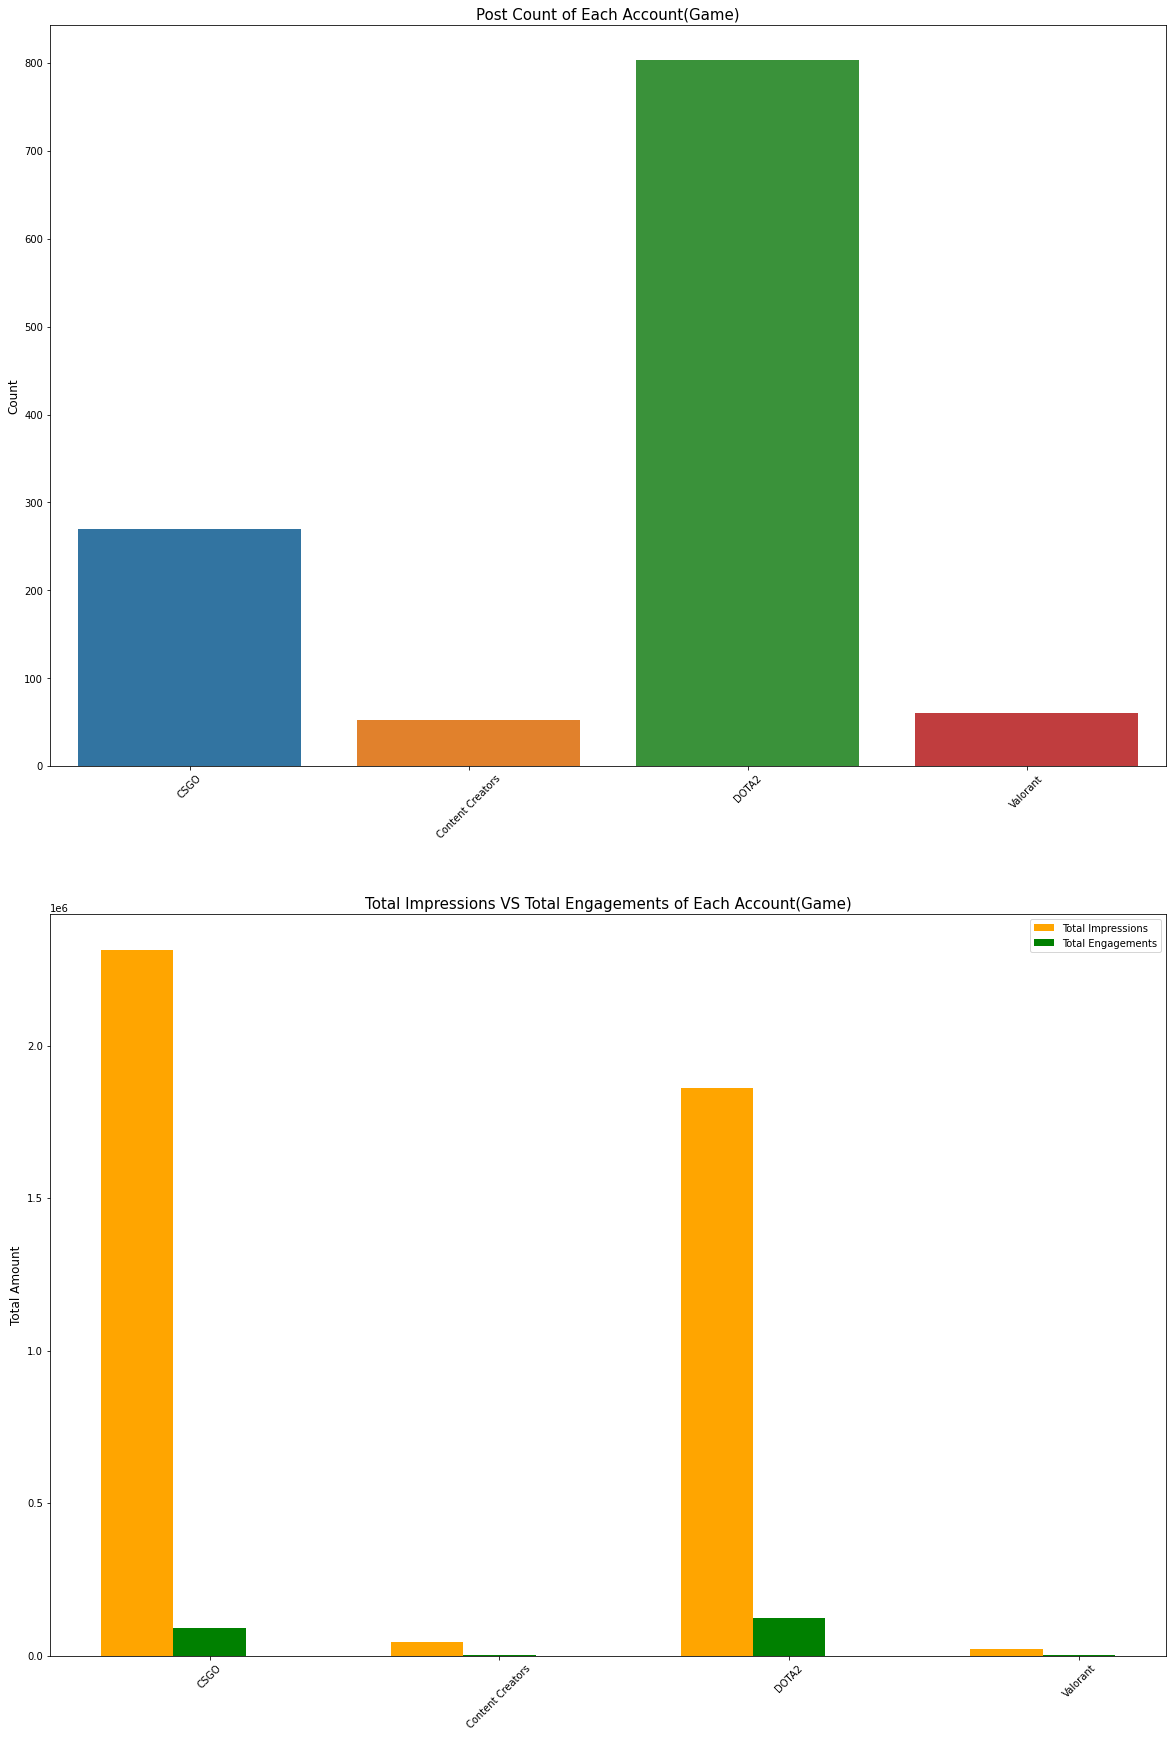

In [18]:
plt.figure(figsize = (20, 30))

plt.subplot(211)
g = sns.barplot(x = 'Account', y = 'Post Count', data = df2sub)
g.set_xticklabels(g.get_xticklabels(), rotation = 45)
g.set_title("Post Count of Each Account(Game)", fontsize = 15)
g.set_xlabel("", fontsize = 12)
g.set_ylabel("Count", fontsize = 12)


plt.subplot(212)
sum_impressions = df2sub['Total Impressions']
sum_engagements = df2sub['Total Engagements']
accounts = df2sub['Account'].unique()

bar_width = 0.25

r1 = np.arange(len(accounts))
r2 = [x + bar_width for x in r1]


plt.bar(r1, sum_impressions, color='orange', width=bar_width, label='Total Impressions')
plt.bar(r2, sum_engagements, color='green', width=bar_width, label='Total Engagements')

plt.title('Total Impressions VS Total Engagements of Each Account(Game)', fontsize = 15)
plt.xlabel('', fontsize = 12)
plt.ylabel('Total Amount', fontsize = 12)
plt.xticks(rotation=45)
plt.xticks([r + bar_width for r in range(len(accounts))], accounts)

plt.legend()

plt.show()



From the previous steps, I found that the "General" as one of the account category has significantly higher values in terms of Post Count, Total Impressions, Total Engagements, and Engagement Rate compared to other account categories. "General" stands out as the top-performing account category and should continue to maintain its high level of performance.

Continuing the analysis of the other four account categories, it appears that CSGO has the highest user following. Despite having only 270 posts, which is one-third of the number of DOTA2's posts, CSGO has higher Total Impressions than DOTA2. However, CSGO does not maintain a high level of engagement, as its Total Engagements are lower than DOTA2, resulting in a lower Engagement Rate. On the other hand, DOTA2 has three times more posts than CSGO, and despite lower Total Impressions, it maintains a higher Engagement Rate due to higher Total Engagements.

For these two games, CSGO needs to focus on increasing engagements, which may require improvements in the content of the posts. DOTA2 needs to enhance impressions, which could involve focusing on post promotions. Comparing these two games, Valorant, being a relatively newer game, has a clear disadvantage in terms of post count. However, its Engagement Rate is comparable to CSGO. This suggests that Valorant has great potential and deserves more attention from the company.

# Q4: What media type performs the best?

In [19]:
df3 = df1.groupby('Media Type').agg({'Published Date': 'count', 'Total Impressions': 'sum', 'Total Engagements': 'sum'}).reset_index()
df3 = df3.rename(columns={'Published Date': 'Post Count'})
df3['Engagement Rate'] = df3['Total Engagements'] / df3['Total Impressions'] * 100
df3['Total Impressions/Post'] = df3['Total Impressions'] / df3['Post Count']
df3['Total Engagements/Post'] = df3['Total Engagements'] / df3['Post Count']
df3

,Media Type,Post Count,Total Impressions,Total Engagements,Engagement Rate,Total Impressions/Post,Total Engagements/Post
0,Album,4,20,8,40.000000,5.000000,2.000000
1,Carousel,9,160689,6541,4.070596,17854.333333,726.777778
2,Link,94,232465,2257,0.970899,2473.031915,24.010638
3,Mixed,5,184984,13664,7.386585,36996.800000,2732.800000
4,Photo,1486,23893685,2162978,9.052509,16079.195828,1455.570659
5,Text,910,3106203,246312,7.929681,3413.409890,270.672527
6,Video,967,10594813,859451,8.111998,10956.373320,888.780765


Like the previous step of analysis, I have created a new data frame that includes 'Media Type' column and other relevant factors. In this data frame, there are three types of media with fewer than 10 posts each, which are 'album', 'carousel', and 'mixed'. Due to the small sample size, I have decided to exclude these media types from further analysis and focus on the remaining data.

I decide to exclude these media types is based on the limited number of posts, which may not provide a representative sample for meaningful analysis. By focusing on the larger sample size, I can obtain more reliable insights and draw conclusions with greater confidence.

In [20]:
df3sub = df3[df3['Media Type'].isin(['Link', 'Photo', 'Text', 'Video'])].copy()
df3sub

,Media Type,Post Count,Total Impressions,Total Engagements,Engagement Rate,Total Impressions/Post,Total Engagements/Post
2,Link,94,232465,2257,0.970899,2473.031915,24.010638
4,Photo,1486,23893685,2162978,9.052509,16079.195828,1455.570659
5,Text,910,3106203,246312,7.929681,3413.409890,270.672527
6,Video,967,10594813,859451,8.111998,10956.373320,888.780765


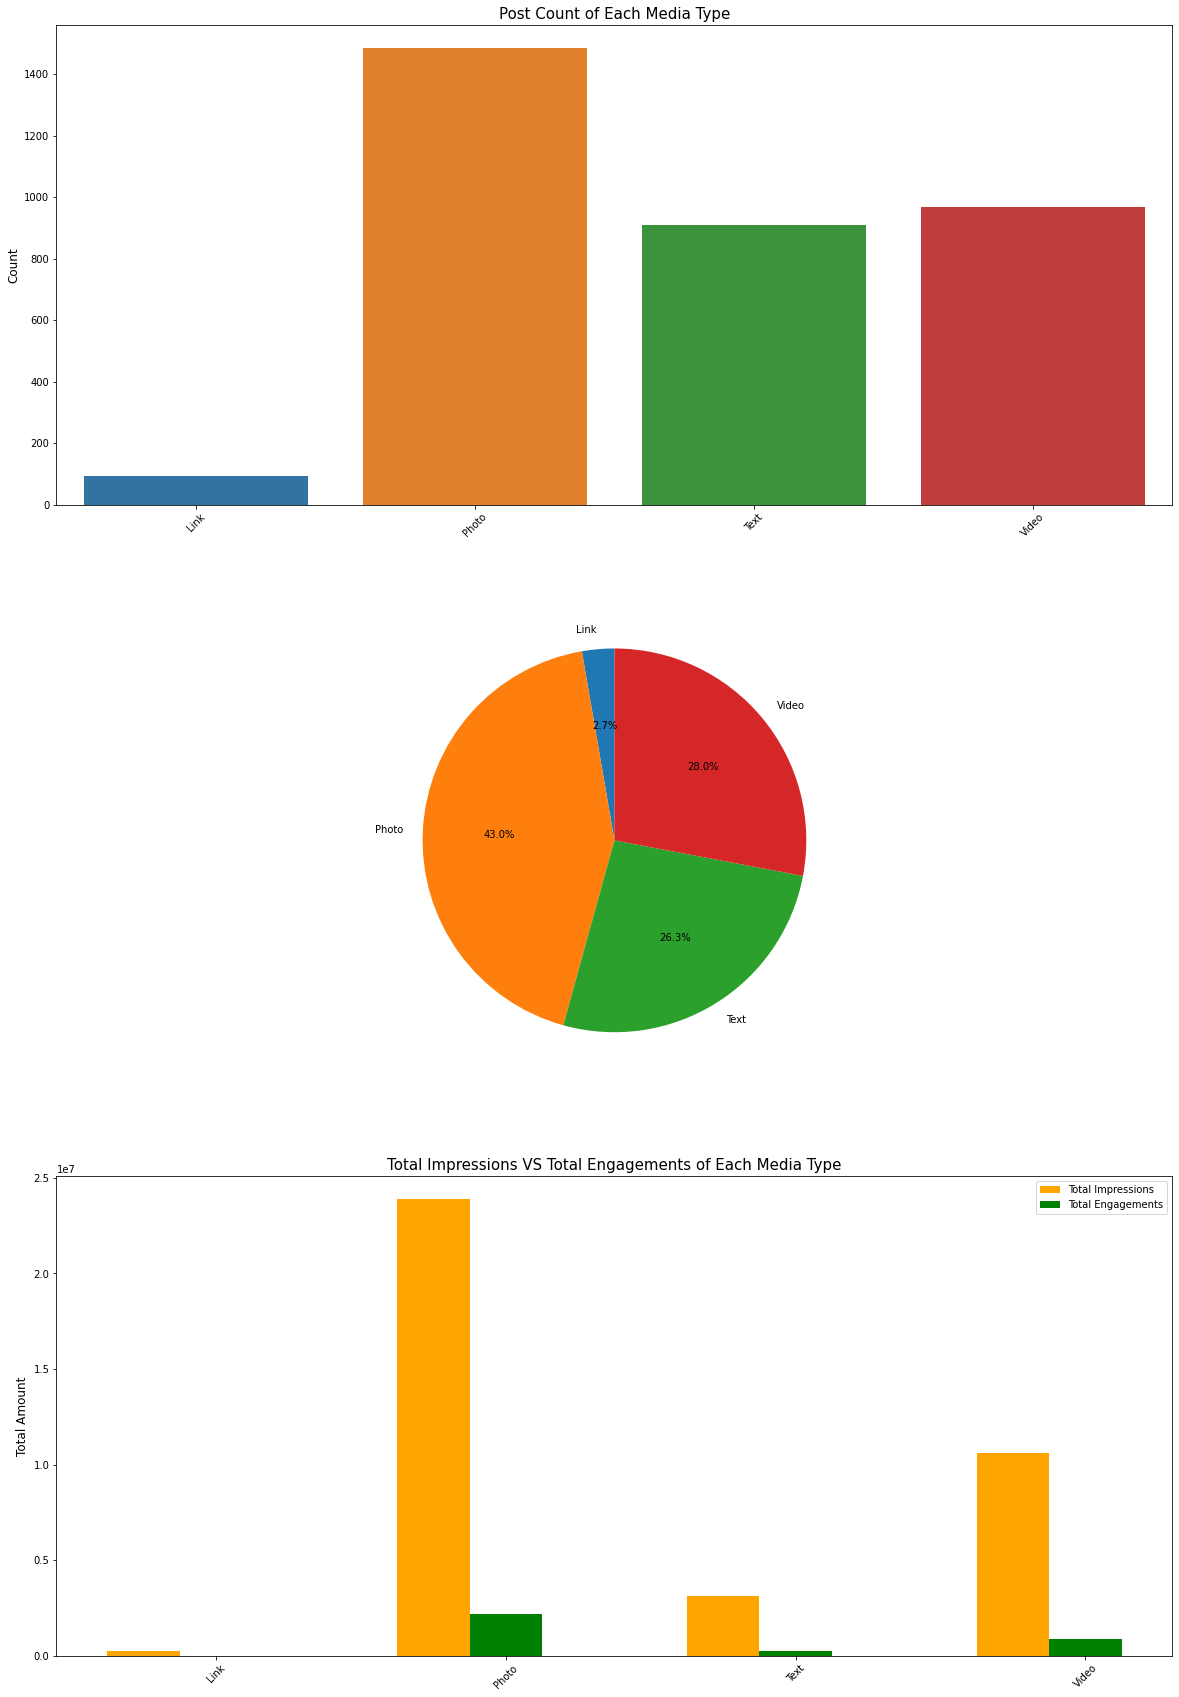

In [21]:
plt.figure(figsize = (20, 30))

plt.subplot(311)
g = sns.barplot(x = 'Media Type', y = 'Post Count', data = df3sub)
g.set_xticklabels(g.get_xticklabels(), rotation = 45)
g.set_title("Post Count of Each Media Type", fontsize = 15)
g.set_xlabel("", fontsize = 12)
g.set_ylabel("Count", fontsize = 12)

plt.subplot(312)
labels = df3sub['Media Type'].tolist()
sizes = df3sub['Post Count']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)


plt.subplot(313)
sum_impressions = df3sub['Total Impressions']
sum_engagements = df3sub['Total Engagements']
media_type = df3sub['Media Type'].unique()

bar_width = 0.25

r1 = np.arange(len(accounts))
r2 = [x + bar_width for x in r1]


plt.bar(r1, sum_impressions, color='orange', width=bar_width, label='Total Impressions')
plt.bar(r2, sum_engagements, color='green', width=bar_width, label='Total Engagements')

plt.title('Total Impressions VS Total Engagements of Each Media Type', fontsize = 15)
plt.xlabel('', fontsize = 12)
plt.ylabel('Total Amount', fontsize = 12)
plt.xticks(rotation=45)
plt.xticks([r + bar_width for r in range(len(media_type))], media_type)

plt.legend()

plt.show()

I focused on media types that have more than 10 posts. In the data, there are four media types that meet this criterion: 'Link', 'Photo', 'Text', and 'Video'. The 'Link' type performs noticeably worse than the other three, so the main analysis and discussion will focus on the 'Photo', 'Text', and 'Video' media types.

In terms of post count, the 'Photo' type has the highest number of posts, which is 43% of the total posts of the 4 media types, while the 'Text' and 'Video' types have almost the same number of posts, which are 23.6% and 28%. When considering total impressions and total engagements, the 'Photo' type outperforms the other two, being the highest in both metrics. The 'Video' type shows a significant advantage over the 'Text' type.

In summary, the primary media types are 'Photo', 'Text', and 'Video', with 'Photo' being the most dominant. The largest number of posts for the 'Photo' type contributes to its highest total impressions and total engagements. The 'Video' type performs significantly better than the 'Text' type, with higher total impressions and total engagements despite having a similar number of posts.

Therefore, the ranking of the top three media types should be 'Photo', 'Video', and 'Text'.

# Q5: What is our best performing campaign?

In [22]:
df4 = df1.groupby('Campaign Name').agg({'Published Date': 'count', 'Total Impressions': 'sum', 'Total Engagements': 'sum'}).reset_index()
df4 = df4.rename(columns={'Published Date': 'Post Count'})
df4['Engagement Rate'] = df4['Total Engagements'] / df4['Total Impressions'] * 100
df4['Total Impressions/Post'] = df4['Total Impressions'] / df4['Post Count']
df4['Total Engagements/Post'] = df4['Total Engagements'] / df4['Post Count']
df4

,Campaign Name,Post Count,Total Impressions,Total Engagements,Engagement Rate,Total Impressions/Post,Total Engagements/Post
0,Community Engagement,1411,23803756,2044767,8.590102,16870.131821,1449.161588
1,Evergreen,163,1328729,43127,3.245733,8151.711656,264.582822
2,Evil Exhibited,420,5742595,185305,3.226851,13672.845238,441.202381
3,N/A,1481,7297779,1018012,13.949614,4927.602296,687.381499


For the Campaign analysis, I have also created a new data frame including Campaign Name, the rest columns are the same as the previous steps. In the Campaign Name column, a large amount of data is shown as N/A, but it does not mean the rest of the columns are also N/A for those rows.

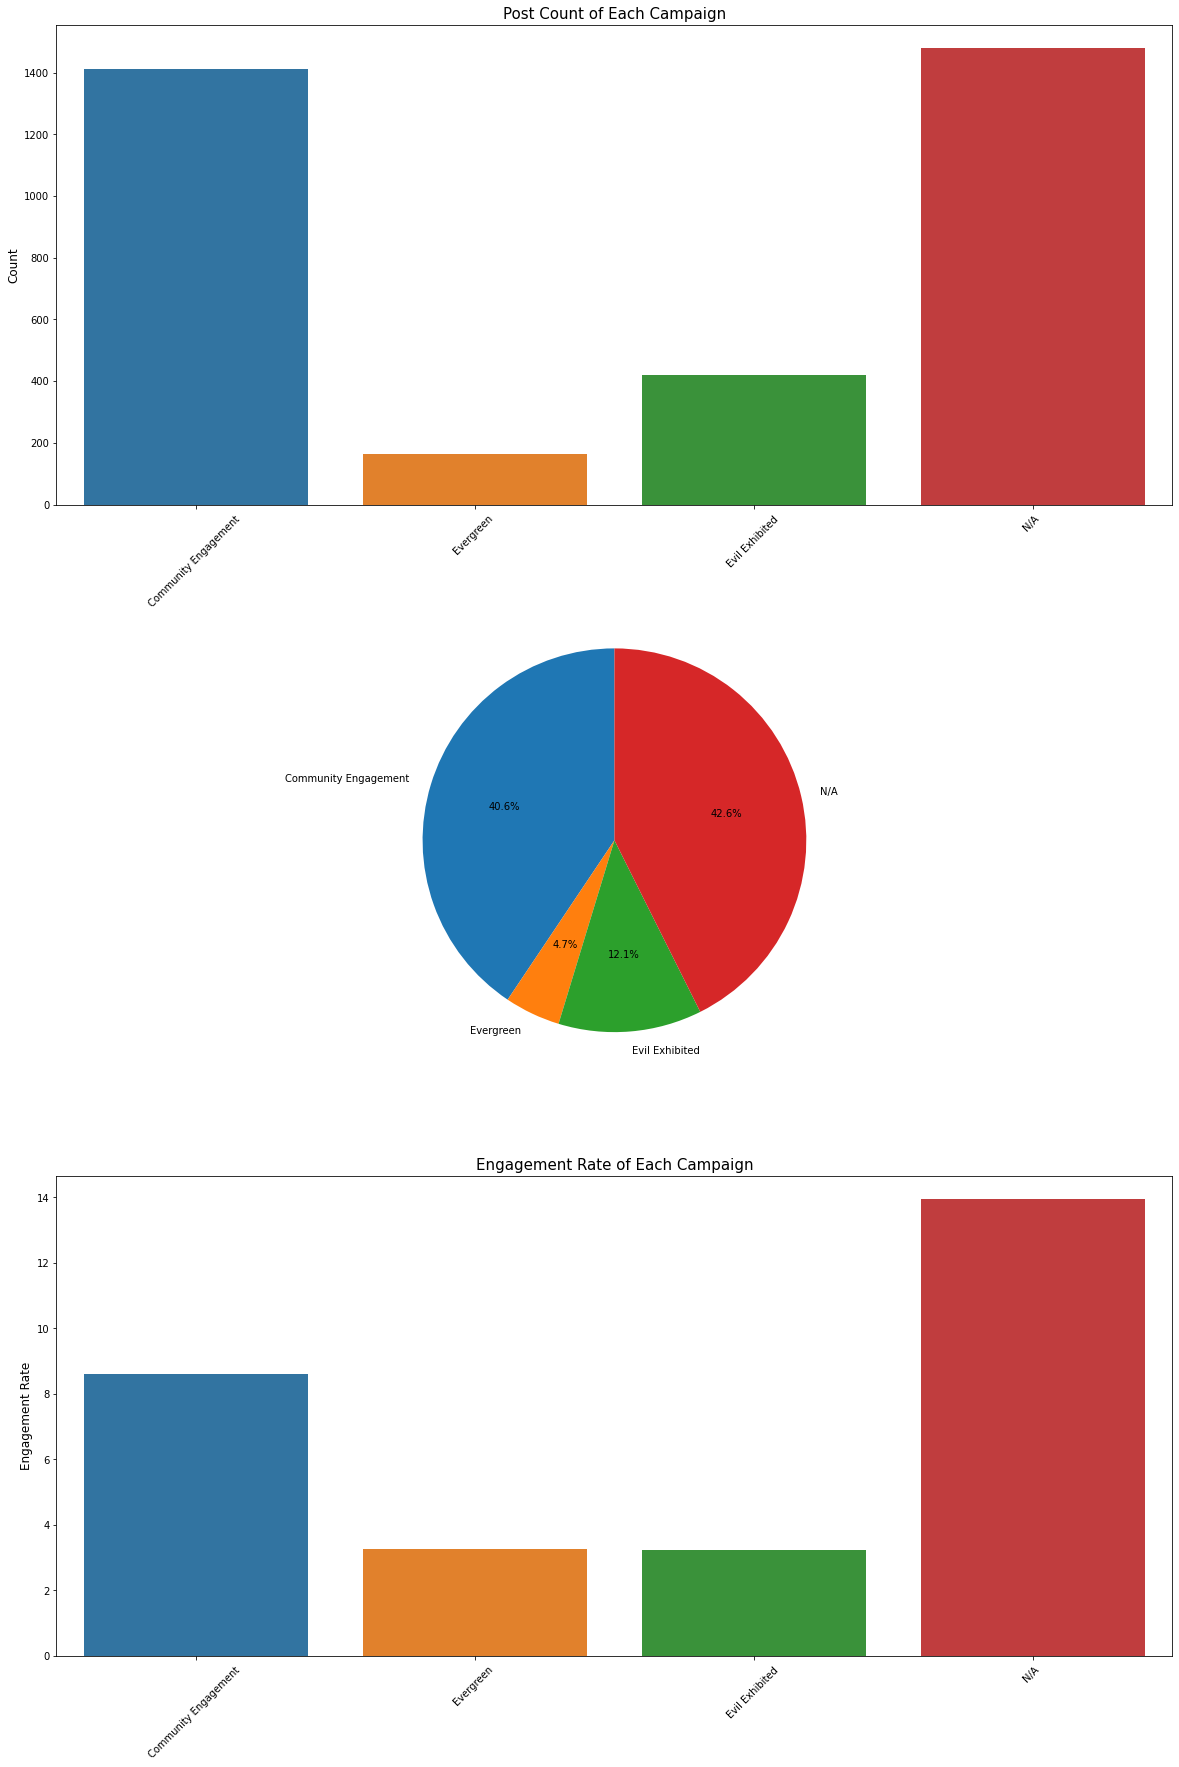

In [23]:
plt.figure(figsize = (20, 30))

plt.subplot(311)
g = sns.barplot(x = 'Campaign Name', y = 'Post Count', data = df4)
g.set_xticklabels(g.get_xticklabels(), rotation = 45)
g.set_title("Post Count of Each Campaign", fontsize = 15)
g.set_xlabel("", fontsize = 12)
g.set_ylabel("Count", fontsize = 12)

plt.subplot(312)
labels = df4['Campaign Name'].tolist()
sizes = df4['Post Count']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)


plt.subplot(313)
g = sns.barplot(x = 'Campaign Name', y = 'Engagement Rate', data = df4)
g.set_xticklabels(g.get_xticklabels(), rotation = 45)
g.set_title("Engagement Rate of Each Campaign", fontsize = 15)
g.set_xlabel("", fontsize = 12)
g.set_ylabel("Engagement Rate", fontsize = 12)


plt.show()

In the data, a significant number of Campaign Names are marked as N/A. After calculating other columns such as post count and engagement rate, in the Campaign Name column, a large amount of data is shown as N/A, but it does not mean the rest of the columns are also N/A for those rows. Interestingly, the N/A category exhibits the best performance. It has the highest post count, accounting for 42.6% of the total, and an average engagement rate of over 13%. The second-best performing campaign is Community Engagement, which accounts for 40.8% of the post count, showing a relatively small difference compared to the top category. However, it only has an average engagement rate of 8.59%, significantly lower than the top category.

In my opinion, I believe that the N/A category cannot be considered as a standalone category. These campaigns may lack a specific campaign type or are difficult to classify using distinct categories. It might be beneficial to replace N/A with categories such as 'General' or 'Other', or create new campaign types to categorize these N/A-marked data points. Among the identified campaign types, Community Engagement stands out as the best-performing and most popular activity.

# Q6: Define out a posting strategy for our social channels based on your discoveries.

In [24]:
df5 = df1.groupby(['Account Type', 'Media Type']).agg({'Published Date': 'count', 'Total Impressions': 'sum', 'Total Engagements': 'sum'}).reset_index()
df5 = df5.rename(columns={'Published Date': 'Post Count'})
df5['Engagement Rate'] = df5['Total Engagements'] / df5['Total Impressions'] * 100
df5['Total Impressions/Post'] = df5['Total Impressions'] / df5['Post Count']
df5['Total Engagements/Post'] = df5['Total Engagements'] / df5['Post Count']
df5

,Account Type,Media Type,Post Count,Total Impressions,Total Engagements,Engagement Rate,Total Impressions/Post,Total Engagements/Post
0,FBPAGE,Album,4,20,8,40.000000,5.000000,2.000000
1,FBPAGE,Link,14,6416,52,0.810474,458.285714,3.714286
2,FBPAGE,Photo,344,9864619,1807907,18.327185,28676.218023,5255.543605
3,FBPAGE,Text,133,1203899,202969,16.859305,9051.872180,1526.082707
4,FBPAGE,Video,86,3397887,561587,16.527536,39510.313953,6530.081395
5,INSTAGRAM,Carousel,9,160689,6541,4.070596,17854.333333,726.777778
6,INSTAGRAM,Link,1,0,0,NaN,0.000000,0.000000
7,INSTAGRAM,Photo,282,1340356,38802,2.894903,4753.035461,137.595745
8,INSTAGRAM,Text,96,0,0,NaN,0.000000,0.000000
9,INSTAGRAM,Video,200,2073014,38744,1.868970,10365.070000,193.720000


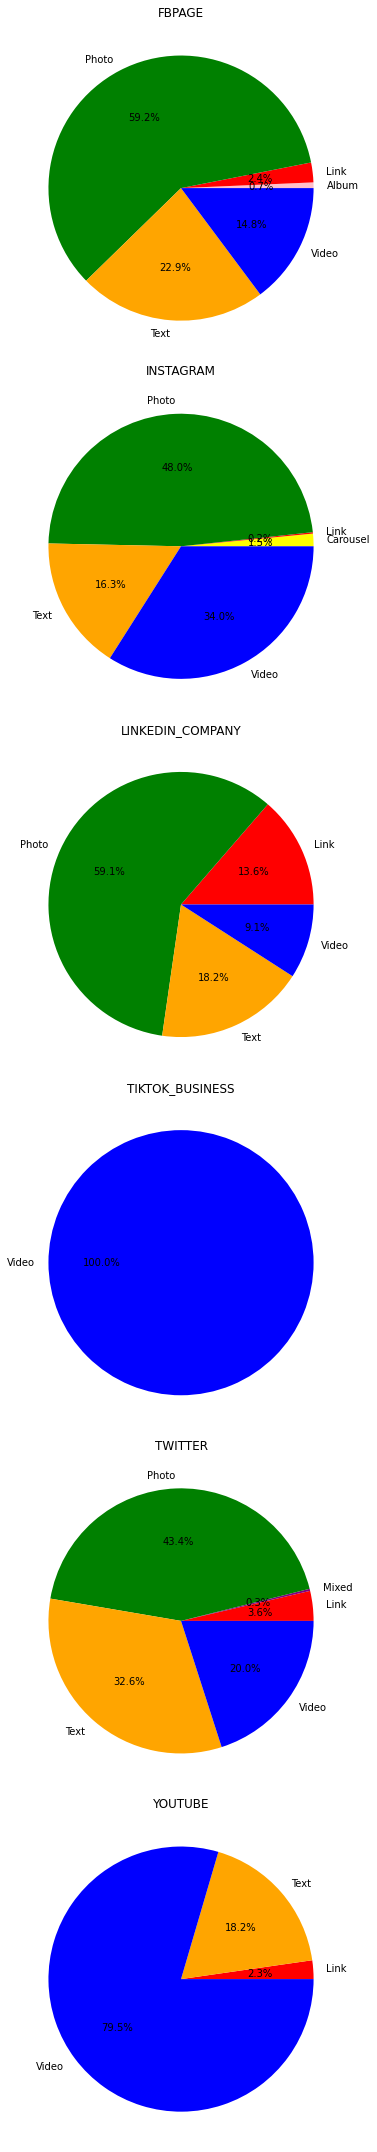

In [25]:
# count  unique account types
account_types = df5['Account Type'].unique()

# Set up the subplots
num_plots = len(account_types)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(20, 30))

# Set up the color
label_colors = {'Video': 'blue', 'Photo': 'green', 'Text': 'orange', 'Link': 'red', 
                'Mixed': 'purple', 'Carousel': 'yellow', 'Album': 'pink'}

# Iterate through each account type and create a pie chart
for i, account_type in enumerate(account_types):
    # Filter the data for the current account type
    filtered_data = df5[df5['Account Type'] == account_type]

    # Get the media types and post counts
    media_types = filtered_data['Media Type']
    post_counts = filtered_data['Post Count']

    # Plot the pie chart
    ax = axes[i]
    ax.pie(post_counts, labels=media_types, autopct='%1.1f%%', colors=[label_colors[label] for label in media_types])
    ax.set_title(account_type)

# Adjust spacing between subplots
plt.tight_layout()

# Display the charts
plt.show()

<Figure size 1440x2160 with 0 Axes>

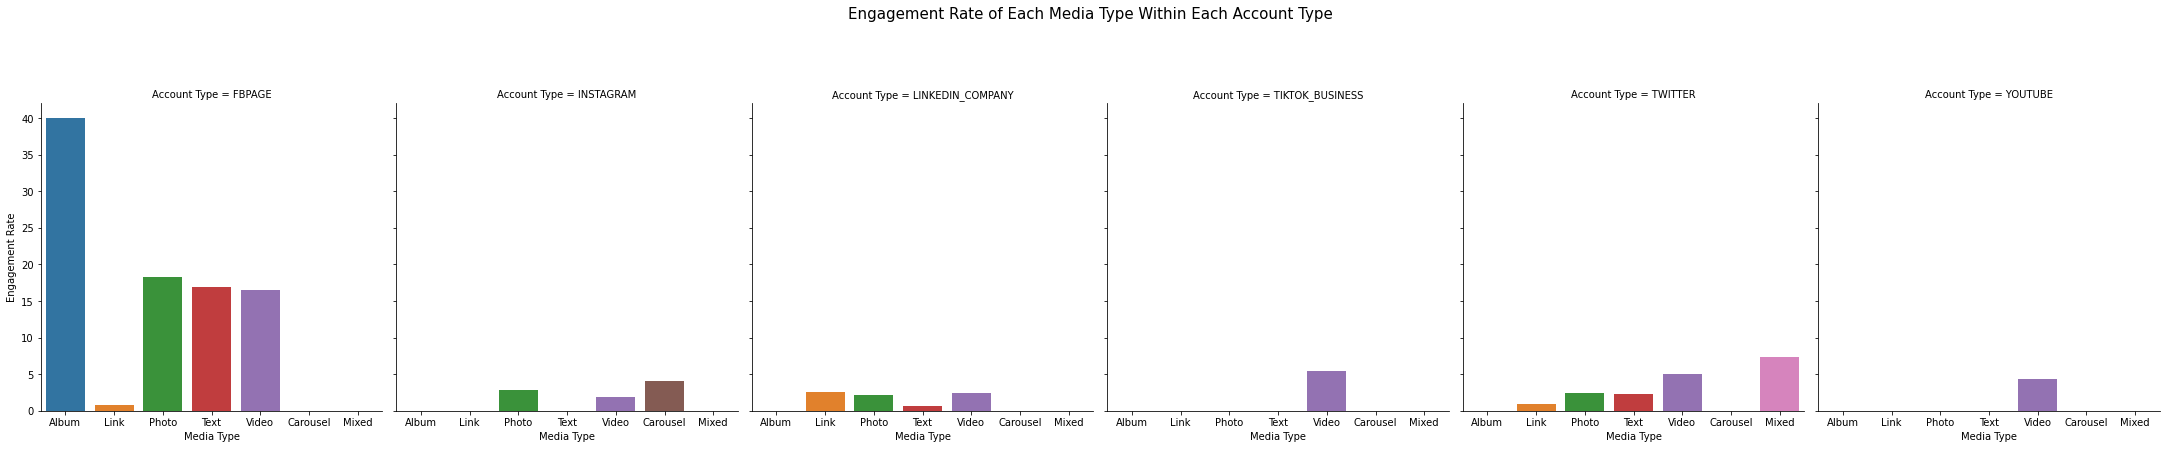

In [26]:
plt.figure(figsize = (20, 30))
g = sns.catplot(x = "Media Type", y = "Engagement Rate", data = df5, col= "Account Type", kind="bar")
g.fig.suptitle("Engagement Rate of Each Media Type Within Each Account Type", y=1.2, fontsize = 15)
plt.show()

To analyze the posting strategy, I grouped the data by Account Type and Media Type to observe the post count for each Media Type within each Account Type. By comparing the proportions of post counts, we can determine the Media Type preferences for different platforms(Account Type). This also indirectly reveals the posting strategy within each platforms. However, the choice of Media Type within this posting strategy is also influenced by the characteristics of the platforms.

Based on previous analysis, I found that the top-performing Media Types are photos, videos, and text. This conclusion applies to most Account Types, but the specific Media Types may vary slightly depending on the characteristics of the Account Type.

First, platforms like Facebook Page, Instagram, Twitter, and LinkedIn_Company are multifaceted media platforms, meaning they support multiple Media Types. Therefore, on these platforms, we still observe that photos, videos, and text dominate the majority of the post proportions. In Facebook Page, photos have the highest proportion, followed by text slightly higher than videos. In Instagram, photos account for nearly 50% of the posts, while videos have a significantly higher proportion than text. In Twitter, the difference in proportion between photos and text is reduced compared to other platforms, with videos ranking third. In LinkedIn Company, aside from the highest proportion of photos, the remaining Media Types are almost equally distributed.

YouTube and TikTok are different significantly from other Media types as they are primarily video-oriented platforms and support other Media Types less than videos. YouTube mainly features medium to long videos, while TikTok focuses on short videos. In these two platforms, video types dominate the majority of the proportions, with TikTok consisting entirely of video content.

Based on the above analysis, I can understand the usage preferences of different Media Types within various Account Types. By combining this with the second visualization, it provides further insights and references when selecting Account Types.

# Q7: What suggestions would you give to the social media team if they want to expand their presence (e.g. if our CSGO youtube channel is doing well should we expand to TikTok)?

In [27]:
df6 = df1.groupby(['Account', 'Account Type']).agg({'Published Date': 'count', 'Total Impressions': 'sum', 'Total Engagements': 'sum'}).reset_index()
df6 = df6.rename(columns={'Published Date': 'Post Count'})
df6['Engagement Rate'] = df6['Total Engagements'] / df6['Total Impressions'] * 100
df6['Total Impressions/Post'] = df6['Total Impressions'] / df6['Post Count']
df6['Total Engagements/Post'] = df6['Total Engagements'] / df6['Post Count']
df6

,Account,Account Type,Post Count,Total Impressions,Total Engagements,Engagement Rate,Total Impressions/Post,Total Engagements/Post
0,CSGO,TWITTER,270,2313918,92336,3.990461,8570.066667,341.985185
1,Content Creators,YOUTUBE,53,45186,1387,3.069535,852.566038,26.169811
2,DOTA2,TWITTER,795,1790811,119389,6.666756,2252.592453,150.174843
3,DOTA2,YOUTUBE,8,68515,4601,6.715318,8564.375000,575.125000
4,General,FBPAGE,581,14472841,2572523,17.774831,24910.225473,4427.750430
5,General,INSTAGRAM,588,3574059,84087,2.352703,6078.331633,143.005102
6,General,LINKEDIN_COMPANY,22,42801,849,1.983599,1945.500000,38.590909
7,General,TIKTOK_BUSINESS,113,344159,18865,5.481478,3045.654867,166.946903
8,General,TWITTER,886,15395867,392834,2.551555,17376.825056,443.379233
9,General,YOUTUBE,99,101723,3409,3.351258,1027.505051,34.434343


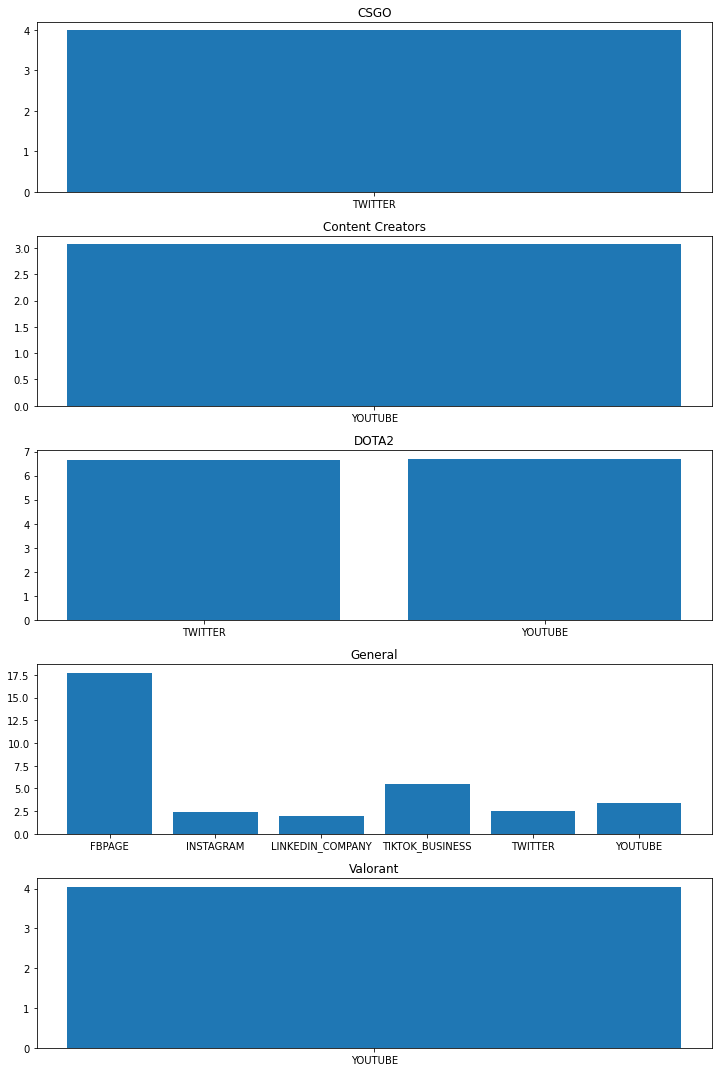

In [28]:
account = df6['Account'].unique()

# Set up the subplots
num_plots = len(account)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, 15))


# Iterate through each account type and create a bar chart
for i, account in enumerate(account):
    # Filter the data for the current account type
    filtered_data = df6[df6['Account'] == account]

    # Get the Account Types and Engagement Rate
    account_types = filtered_data['Account Type']
    engagement_rate = filtered_data['Engagement Rate']

    # Plot the bar chart
    ax = axes[i]
    ax.bar(account_types, engagement_rate)
    ax.set_title(account)

# Adjust spacing between subplots
plt.tight_layout()

# Display the charts
plt.show()

To analyze the performance of different Accounts on different platforms, I grouped the data by Account and Account Type, and created a bar plot to observe the average Engagement Rate of each Account on each Account Type. Upon observation, I found that the 'General' Account is the only one that has posts on every Account Type (platform), and its Engagement Rate on Facebook Page is significantly higher than on other platforms. Therefore, I believe that the General Account can continue to maintain its current presence.

'CSGO' Account currently has all its posts on Twitter. Based on the earlier analysis of platform characteristics, other multifaceted media platforms are Twitter, Facebook Page, Instagram, and LinkedIn Company, and considering the analysis of platform performance, I suggest expanding the number of posts for the CSGO Account on the Facebook Page.

The "Content Creators" and "Valorant" Accounts have all their posts on the YouTube platform. I suggest that these two Account types explore developing their presence on the TikTok platform. Both YouTube and TikTok are video-oriented platforms, and the box plot for TikTok indicates higher min and max engagement rates compared to YouTube.

The "Dota2" Account has posts on both Twitter and YouTube, and the average engagement rates on both platforms are almost equal. Similarly, I suggest that the Dota2 Account can consider expanding to the TikTok platform with video-type posts. For photo and text-type posts, the Dota2 Account can explore expanding to the Facebook Page platform.

# Additional Findings

In [29]:
df7 = df1.groupby(['Account', 'Media Type']).agg({'Published Date': 'count', 'Total Impressions': 'sum', 'Total Engagements': 'sum'}).reset_index()
df7 = df7.rename(columns={'Published Date': 'Post Count'})
df7['Engagement Rate'] = df7['Total Engagements'] / df7['Total Impressions'] * 100
df7['Total Impressions/Post'] = df7['Total Impressions'] / df7['Post Count']
df7['Total Engagements/Post'] = df7['Total Engagements'] / df7['Post Count']
df7

,Account,Media Type,Post Count,Total Impressions,Total Engagements,Engagement Rate,Total Impressions/Post,Total Engagements/Post
0,CSGO,Link,20,7898,97,1.228159,394.900000,4.850000
1,CSGO,Photo,139,1541157,48038,3.117009,11087.460432,345.597122
2,CSGO,Text,62,38643,1341,3.470227,623.274194,21.629032
3,CSGO,Video,49,726220,42860,5.901793,14820.816327,874.693878
4,Content Creators,Link,3,0,0,NaN,0.000000,0.000000
5,Content Creators,Text,12,0,0,NaN,0.000000,0.000000
6,Content Creators,Video,38,45186,1387,3.069535,1189.105263,36.500000
7,DOTA2,Link,9,8827,519,5.879687,980.777778,57.666667
8,DOTA2,Mixed,2,8928,1413,15.826613,4464.000000,706.500000
9,DOTA2,Photo,331,1071172,68611,6.405227,3236.169184,207.283988


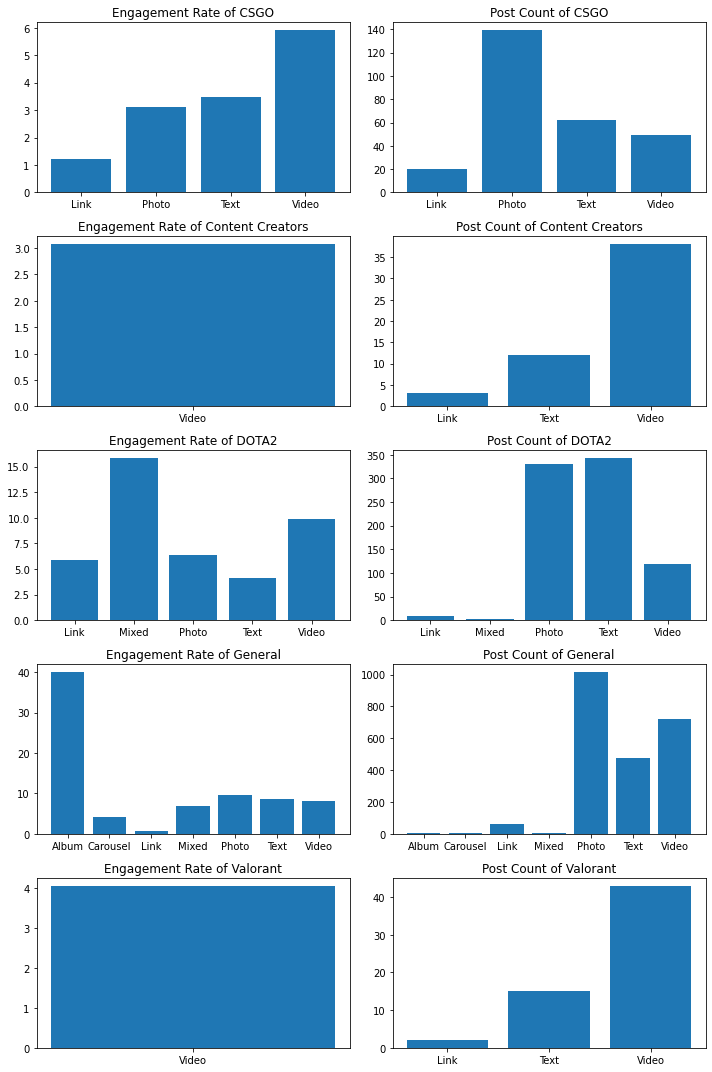

In [30]:
account = df7['Account'].unique()

# Set up the subplots
num_plots = len(account)
fig, axes = plt.subplots(nrows=num_plots, ncols=2, figsize=(10, 15))


# Iterate through each account type and create a bar chart
for i, account in enumerate(account):
    # Filter the data for the current account type
    filtered_data = df7[df7['Account'] == account]

    # Get the Account Types and Engagement Rate
    media_types = filtered_data['Media Type']
    engagement_rate = filtered_data['Engagement Rate']
    post_count = filtered_data['Post Count']

    # Plot the bar chart
    ax = axes[i][0]
    ax.bar(media_types, engagement_rate)
    ax.set_title('Engagement Rate of '+ account)
    
    ax = axes[i][1]
    ax.bar(media_types, post_count)
    ax.set_title('Post Count of '+ account)
# Adjust spacing between subplots
plt.tight_layout()

# Display the charts
plt.show()

Here are some additional findings, mainly focused on observing the Media Type preferences and corresponding Post Counts across different Accounts. Although there are occasional exceptions, in most cases, Video type is associated with the highest average Engagement Rate among Media Types. However, the Post Count for Videos is generally lower compared to Photos and Text. This could be attributed to the varying editing and production time required for Photos, Text, and Videos, resulting in different time costs.

Therefore, I suggest that when the difference in Engagement Rates for different Media Types is not significant for Accounts (e.g. General Account), it would be advisable to choose the Media Type with lower time costs. On the other hand, when Videos exhibit a clear advantage in terms of Engagement Rates (e.g. CSGO, DOTA2), it would be beneficial to increase the Post Count for Video Types accordingly.

These recommendations aim to optimize the posting strategy, taking into consideration the Media Type preferences of each Accounts and the associated time and resource constraints, in order to achieve better engagement outcomes.